# Homework Week 7

Nama  : Radisha Fanni Sianti <br> Batch : 31

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [3]:
#Data
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Soal Pertama
Tunjukkan statistika deskriptif untuk variabel harga rumah 
(Column Name : SalePrice)! <br> Ceritakan kepada tim bisnis apa makna dari nilai nilai 
tersebut!

In [85]:
# Ukuran Pemusatan Data
round(data["SalePrice"].describe(),2)

count      1460.0
mean     180921.2
std       79442.5
min       34900.0
25%      129975.0
50%      163000.0
75%      214000.0
max      755000.0
Name: SalePrice, dtype: float64

In [101]:
# Ukuran Penyebaran Data
print("Jangkauan = ",data["SalePrice"].max() - data["SalePrice"].min())
print("Jangkauan antar kuartil = ",data["SalePrice"].quantile(0.75) - data["SalePrice"].quantile(0.25))
print("Simpangan kuartil = ",(data["SalePrice"].quantile(0.75) - data["SalePrice"].quantile(0.25))/2)

Jangkauan =  720100
Jangkauan antar kuartil =  84025.0
Simpangan kuartil =  42012.5


Interpretasi : <br>
Ukuran Pemusatan yang digunakan adalah mean, median, kuartil 1 dan kuartil 3 sedangkan ukuran penyebaran yang digunakan adalah standar deviasi, jangkauan, jangkauan antar kuartil dan simpangan kuartil. Variabel SalePrice memiliki nilai mean sebesar 180921,2 dollar. Nilai tersebut lebih besar dibandingkan nilai mediannya yaitu sebesar 163000 dollar. Dengan nilai mean > median maka dapat diasumsikan tipe distribusi pada variabel SalePrice adalah positively skewed atau skew ke arah kanan. Kemudian nilai standar deviasi variabel SalePrice sebesar 79442,5 dollar yang dimana nilai tersebut lebih kecil dari pada nilai meannya. Hal ini menunjukkan variabel SalePrice yang kurang beragam.

## Soal Kedua
Tunjukkan statistika deskriptif untuk variabel harga rumah 
(Column Name : SalePrice) setiap tahunnya (Column Name : 
YrSold)! <br>
Secara deskriptif jelaskan apakah ada perbedaan setiap 
tahunnya atau tidak?

In [102]:
# Ukuran Pemusatan Data
data_per_tahun = round(data.groupby(["YrSold"])["SalePrice"].describe(),2)
data_per_tahun

,count,mean,std,min,25%,50%,75%,max
YrSold,,,,,,,,
2006,314.0,182549.46,79426.84,35311.0,131375.0,163995.0,218782.5,625000.0
2007,329.0,186063.15,85768.17,39300.0,129900.0,167000.0,219500.0,755000.0
2008,304.0,177360.84,69735.61,40000.0,131250.0,164000.0,207000.0,446261.0
2009,338.0,179432.10,80879.24,34900.0,125250.0,162000.0,212750.0,582933.0
2010,175.0,177393.67,80451.28,55000.0,128100.0,155000.0,213250.0,611657.0


In [124]:
# Ukuran Penyebaran Data
data_per_tahun["Jangkauan"] = data_per_tahun["max"]-data_per_tahun["min"]
data_per_tahun["Jangkauan Antar Kuartil"] = data_per_tahun["75%"]-data_per_tahun["25%"]
data_per_tahun["Simpangan Kuartil"] = (data_per_tahun["75%"]-data_per_tahun["25%"])/2
data_per_tahun

,count,mean,std,min,25%,50%,75%,max,Jangkauan,Jangkauan Antar Kuartil,Simpangan Kuartil
YrSold,,,,,,,,,,,
2006,314.0,182549.46,79426.84,35311.0,131375.0,163995.0,218782.5,625000.0,589689.0,87407.5,43703.75
2007,329.0,186063.15,85768.17,39300.0,129900.0,167000.0,219500.0,755000.0,715700.0,89600.0,44800.00
2008,304.0,177360.84,69735.61,40000.0,131250.0,164000.0,207000.0,446261.0,406261.0,75750.0,37875.00
2009,338.0,179432.10,80879.24,34900.0,125250.0,162000.0,212750.0,582933.0,548033.0,87500.0,43750.00
2010,175.0,177393.67,80451.28,55000.0,128100.0,155000.0,213250.0,611657.0,556657.0,85150.0,42575.00


In [112]:
data_2006 = data[data["YrSold"] == 2006]
data_2007 = data[data["YrSold"] == 2007]
data_2008 = data[data["YrSold"] == 2008]
data_2009 = data[data["YrSold"] == 2009]
data_2010 = data[data["YrSold"] == 2010]

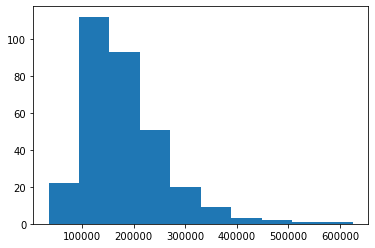

In [116]:
plt.hist(data_2006["SalePrice"])
plt.show()

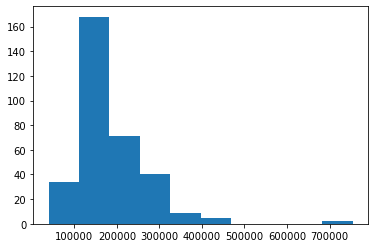

In [117]:
plt.hist(data_2007["SalePrice"])
plt.show()

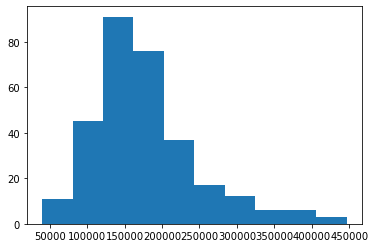

In [118]:
plt.hist(data_2008["SalePrice"])
plt.show()

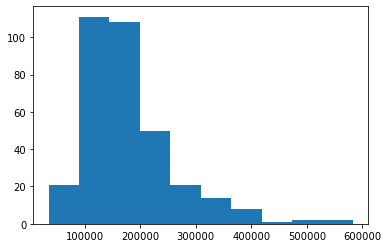

In [119]:
plt.hist(data_2009["SalePrice"])
plt.show()

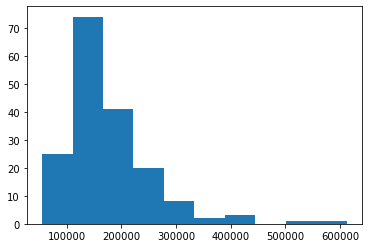

In [120]:
plt.hist(data_2010["SalePrice"])
plt.show()

Interpretasi : <br>
Terdapat historis 5 tahun pada data Hpuse Prices dari tahun 2006-2010. Dalam 5 tahun tersebut terdapat jumlah pembelian rumah yang berfluktuasi naik dan turun. Ukuran Pemusatan yang digunakan adalah mean, median, kuartil 1 dan kuartil 3 sedangkan ukuran penyebaran yang digunakan adalah standar deviasi, jangkauan, jangkauan antar kuartil dan simpangan kuartil.Kenaikan terbesar terjadi pada tahun 2008 - 2009 dan penurunan terbesar terjadi pada 2009 - 2010. Jika dibandingkan mean per tahun dengan mean data keseluruhan, pada tahun 2006-2007 memiliki nilai mean per tahun lebih besar dari pada mean data keseluruhan. Sedangkan pada tahun 2008-2010 memiliki nilai mean per tahun lebih kecil dari pada mean data keseluruhan. Setiap tahunnya nilai standar deviasi SalePrice selalu lebih kecil dibandingkan dengan nilai meannya. Hal ini menunjukkan bahwa variabel SalesPrice kurang beragam tiap tahunnya. <br>
Secara deskriptif terlihat bahwa terdapat perbedaan nilai mean pada SalePrice di setiap tahunnya. Secara plot histogram setiap tahun memiliki tipe distribusi postively skewed yang bersesuaian dengan plot histogram data keseluruhan. Namun, apabila secara statistik perlu dilakukan analisis lebih lanjut uji ANOVA.

## Soal Ketiga
Bagaimana distribusi harga rumah tersebut. Gunakan histogram plot 
tidak terbatas hanya histogram saja. Jelaskan sebaiknya untuk 
analisa apakah lebih baik menggunakan mean atau menggunakan 
median? Beserta alasannya (Column Name : SalePrice) <br> Ceritakan analisa tersebut dengan sudut pandang statistika. Buatlah 
tim bisnis paham maksud dari grafik histogram tersebut.

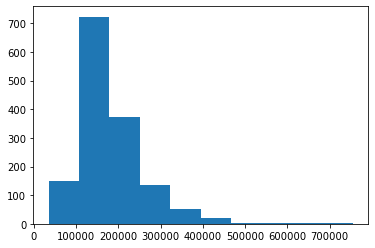

In [87]:
plt.hist(data["SalePrice"])
plt.show()

Interpretasi :
Berdasarkan hasil analisis histogram terlihat bahwa variabel SalePrice memiliki tipe distribusi positively skewed yang artinya nilai mean pada variabel tersebut lebih besar dibandingkan nilai mediannya.

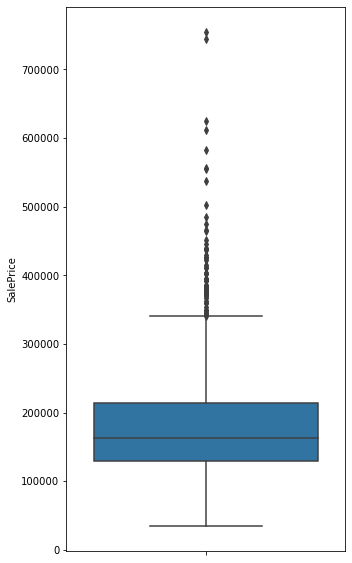

In [88]:
plt.figure(figsize = (5,10))
sns.boxplot(y="SalePrice",data = data)
plt.show()

Interpretasi : <br>
Berdasarkan box plot terlihat bahwa pada variabel SalePrice terdapat beberapa outlier sehingga untuk penggunaan mean pada variabel ini tidak disarankan karena ukuran mean tidak robust terhadap adanya outliers. Ukuran pemusatan yang dapat digunakan untuk SalePrice adalah median karena ukuran ini relatif robust terhadap outlier. Penggunaan median pada data SalePrice lebih representatif dibandingkan dengan menggunakan mean.

## Soal Keempat
Karena ada pernyataan bahwa setiap tahunnya harga 
rumah itu pasti naik. (tahun terjual : YrSold, harga rumah : 
SalePrice) Silahkan teman-teman buktikan dengan data yang 
ada menggunakan ilmu statistika? (Tidak terbatas pada 
pengujian apapun)

In [4]:
round(data.groupby(["YrSold"])["SalePrice"].describe(),2)

,count,mean,std,min,25%,50%,75%,max
YrSold,,,,,,,,
2006,314.0,182549.46,79426.84,35311.0,131375.0,163995.0,218782.5,625000.0
2007,329.0,186063.15,85768.17,39300.0,129900.0,167000.0,219500.0,755000.0
2008,304.0,177360.84,69735.61,40000.0,131250.0,164000.0,207000.0,446261.0
2009,338.0,179432.10,80879.24,34900.0,125250.0,162000.0,212750.0,582933.0
2010,175.0,177393.67,80451.28,55000.0,128100.0,155000.0,213250.0,611657.0


Untuk menetukan apakah ada perbedaan di setiap tahunnya perlu dilakukan analisis lebih lanjut dengan menggunakan ANOVA. Berikut adalah langkah-langkah ANOVA : <br>
1. Menentukan Hipotesis <br>
H0 : Tidak ada perbedaan rata-rata pada SalePrice setiap tahunnya <br>
H1 : Ada perbedaan rata-rata pada SalePrice setiap tahunnya
2. Menentukan nilai mean masing-masing tahun

In [5]:
data_2006 = data[data["YrSold"] == 2006]
data_2007 = data[data["YrSold"] == 2007]
data_2008 = data[data["YrSold"] == 2008]
data_2009 = data[data["YrSold"] == 2009]
data_2010 = data[data["YrSold"] == 2010]

3. Menghitung statistik F

In [6]:
data_2006

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000
17,18,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
20,21,60,RL,101.0,14215,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,New,Partial,325300
28,29,20,RL,47.0,16321,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,207500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1431,60,RL,60.0,21930,Pave,NaN,IR3,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,192140
1434,1435,20,RL,80.0,17400,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,160000
1449,1450,180,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Abnorml,92000
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000


In [92]:
anova = st.f_oneway(data_2006["YrSold"], data_2007["YrSold"],data_2008["YrSold"],
                    data_2009["YrSold"], data_2010["YrSold"])
anova

F_onewayResult(statistic=inf, pvalue=0.0)

In [93]:
pvalue = anova.pvalue
pvalue

0.0

4. Menentukan keputusan

In [95]:
if pvalue < 0.05:
  print("Keputusan yang diambil adalah tolak H0")
else:
  print("Keputusan yang diambil adalah terima H0")

Keputusan yang diambil adalah tolak H0


Kesimpulan : <br>
Berdasarka uji ANOVA didapatkan kesimpulan tolak H0, artinya ada perbedaan rata-rata pada SalePrice setiap tahunnya.

## Soal Advanced
Kasus yang akan digunakan adalah membuka akun deposit untuk 
nasabah bank. Pada kesempatan kali ini data scientist diminta tolong 
untuk menganalisa hasil ab-testing suatu perusahaan bank. Apakah 
jumlah campaign mampu meningkatkan keinginan user untuk 
membuka akun deposit atau tidak?

Data yang digunakan berasal dari folder bank.zip file yang digunakan 
adalah bank-full.csv
1. Untuk variabel jumlah campaign bisa dicek untuk kolom 
campaign 
2. Untuk variabel apakah akhirnya user membuka akun atau tidak 
bisa menggunakan variabel y

In [30]:
data_bank = pd.read_csv("bank-full.csv", delimiter = ";")
data_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [125]:
data_bank.shape

(45211, 17)

In [136]:
yes = data_bank[data_bank["y"] == "yes"].campaign.mean()
round(yes,2)

2.14

In [137]:
no = data_bank[data_bank["y"] == "no"].campaign.mean()
round(no,2)

2.85

## Pemahaman konsep A/B Testing
1. Apa nama experimentnya? <br>
AB test Pengaruh jumlah campaign terhadap jumlah nasabah bank yang  membuka akun deposit



2. Definisikan Hipotesis <br>
Jumlah campaign yang meningkat akan meningkatkan keinginan nasabah bank untuk membuka akun deposit
                           

3. Siapa participant-nya? <br>
Nasabah bank tersebut

4. Variabel yang akan diuji apa? <br>
Variabel campaign dan y

5. Metrics apa yang akan digunakan? <br>
Jumlah nasabah bank yang membuka akun deposit, jumlah nasabah bank yang tidak membuka akun deposit

6. Berapa sample size dan durasi experiment? <br>
Sample size yang digunakan dapat dihitung dengan menggunakan rumus Slovin 

In [130]:
N = 45211
e = 0.05

In [133]:
Slovin = N/(1+(N*e*e))
round(Slovin)

396

Berdasarkan hasil perhitungan rumus Slovin didapatkan nilai sampel yang ideal sebanyak 396. Untuk melakukan experiment diperlukan durasi experiment sekitar 1 minggu

## Pengujian Hipotesis
1. Penentuan hipotesis <br>
H0 = Tidak ada pengaruh signifikan antara jumlah campaign terhadap keinginan nasabah membuka akun deposit <br>
H1 = Ada pengaruh signifikan antara jumlah campaign terhadap keinginan nasabah membuka akun deposit

2. Pengujian yang digunakan <br>
Akan dilakukan uji hipotesis untuk mengetahui pengaruh campaign selaku variabel bebas terhadap variabel y selaku variabel terikat menggunakan uji T

3. Deteksi asumsi beserta cara penanganannya

In [141]:
yes = data_bank[data_bank["y"] == "yes"]
no = data_bank[data_bank["y"] == "no"]

In [142]:
yes['campaign'].mean()
no['campaign'].mean()

2.8463503832473322

In [144]:
ttest = st.ttest_ind(a = yes["campaign"], b=no["campaign"])
ttest

Ttest_indResult(statistic=-15.599948860003781, pvalue=1.0123473642096297e-54)

4. Hasil pengujian hipotesis

In [146]:
p_value = ttest.pvalue
p_value

1.0123473642096297e-54

In [147]:
if pvalue < 0.05:
  print("Keputusan yang diambil adalah tolak H0")
else:
  print("Keputusan yang diambil adalah terima H0")

Keputusan yang diambil adalah tolak H0


5. Kesimpulan dan interpretas

Kesimpulan : <br>
Berdasarka uji T didapatkan kesimpulan tolak H0, artinya ada pengaruh signifikan antara jumlah campaign terhadap keinginan nasabah membuka akun deposit